In [1]:
from sklearn.datasets import fetch_openml
import tensorflow as tf

import numpy as np
import pandas as pd
import tensorflow as tf


import emoji

import matplotlib.pyplot as plt
plt.style.use(style="seaborn")
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
df1 = pd.read_csv(r"C:\Users\rahul\Desktop\EE258\Project 2/train.csv")
df2 = pd.read_csv(r"C:\Users\rahul\Desktop\EE258\Project 2/test.csv")

In [3]:
df1.shape

(7613, 5)

In [4]:
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df1.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df1.fillna(-99, inplace = True)

In [8]:
df1.head()

,id,keyword,location,text,target
0,1,-99,-99,Our Deeds are the Reason of this #earthquake M...,1
1,4,-99,-99,Forest fire near La Ronge Sask. Canada,1
2,5,-99,-99,All residents asked to 'shelter in place' are ...,1
3,6,-99,-99,"13,000 people receive #wildfires evacuation or...",1
4,7,-99,-99,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df1.keyword.value_counts()

-99                      61
fatalities               45
armageddon               42
deluge                   42
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [10]:
df1.location.value_counts()

-99                        2533
USA                         104
New York                     71
United States                50
London                       45
                           ... 
Sanganer, Rajasthan           1
dreamy lake                   1
The Desert of the Real        1
Portage, IN / Worldwide       1
Le Moyne '16                  1
Name: location, Length: 3342, dtype: int64

In [11]:
disaster = df1[df1.target==1].shape[0]
Nondisaster = df1[df1.target==0].shape[0]

In [12]:
disaster

3271

In [13]:
Nondisaster

4342

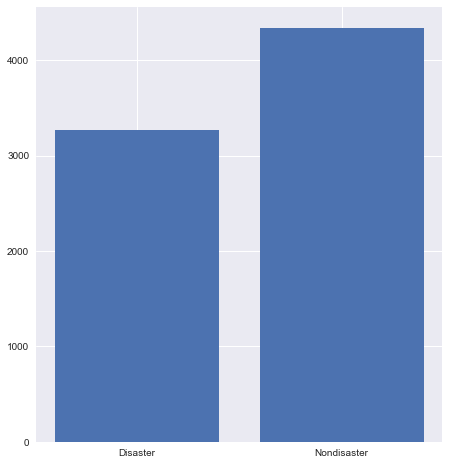

In [14]:
plt.figure(1, figsize=(16,8))
plt.subplot(1,2,1)
plot1 = plt.bar(['Disaster', 'Nondisaster'],[disaster, Nondisaster])

In [15]:
def plot_target_based_feature(feature):
    x1 = df1[df1.target==1][feature]
    x2 = df1[df1.target==0][feature]
    plt.figure(1, figsize = (16,8))
    plot2 = plt.hist(x2, alpha = 0.5, color ="grey", bins = 50)
    plot2 = plt.hist(x1, alpha = 0.5, color ="red", bins = 50)
    
    return plot2
    

# Number of Character in the Tweet

In [16]:
df1['text_len'] = df1.text.map(lambda x: len(x))

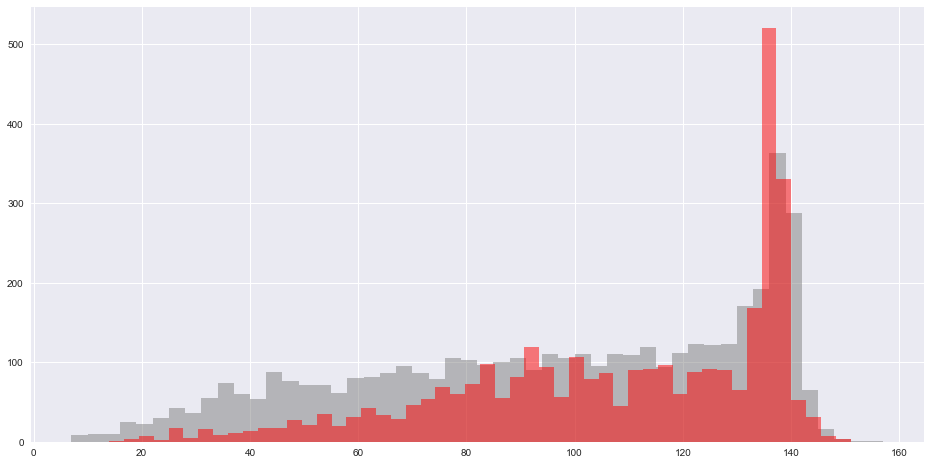

In [17]:
plot2 = plot_target_based_feature('text_len')

# Number of Words in the tweet

In [18]:
df1['word_count'] = df1.text.str.split().map(lambda x: len(x))

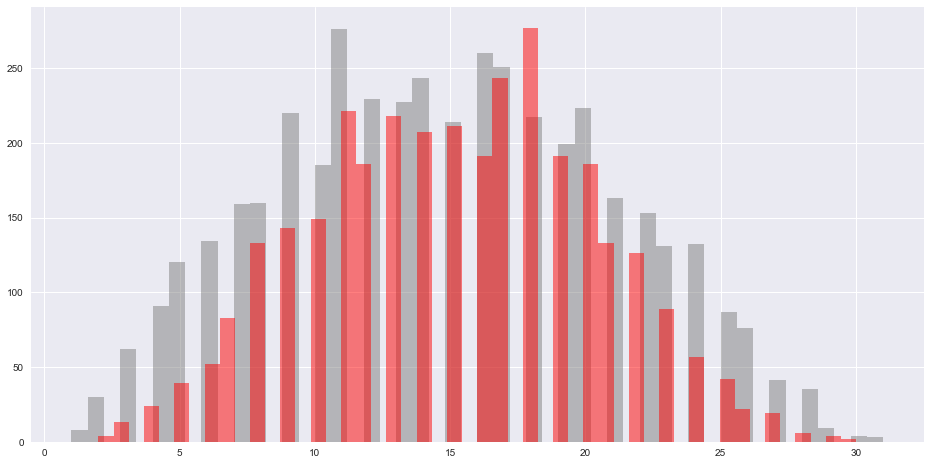

In [19]:
plot2 = plot_target_based_feature('word_count')

# Number of Unique Words

In [20]:
df1["Unique_words"] = df1.text.map(lambda x: len(set(str(x).split())))

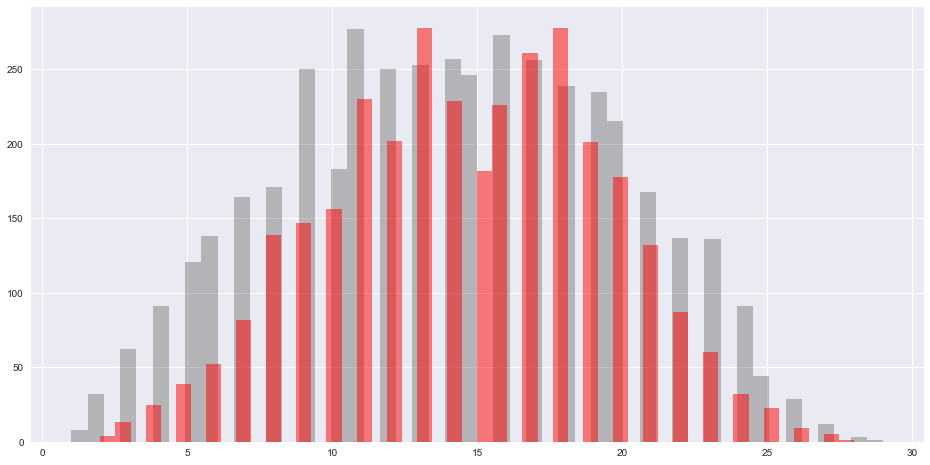

In [21]:
plot2 = plot_target_based_feature('Unique_words')

# Number of Punctuation 

In [22]:
import string

df1["Punctuation"] = df1["text"].map(lambda x: len([c for c in str(x) if c in string.punctuation]))

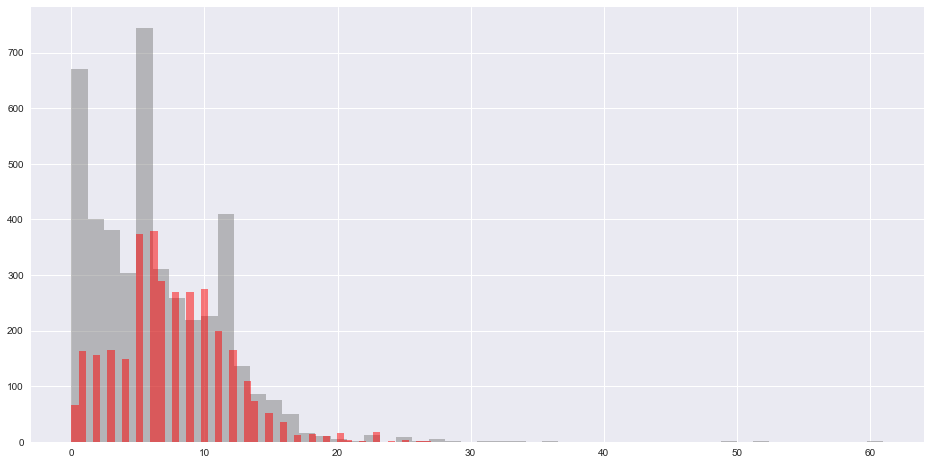

In [23]:
plot2 = plot_target_based_feature('Punctuation')

# Creating a corpus of words from Tweet

In [24]:
def creat_corpus (data, target):
    corpus = []
    for x in df1[df1['target']==target].text.str.split():
        for i in x:
            corpus.append(i)
    return corpus
    

# Finding Stop word

In [25]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [27]:
from collections import defaultdict

In [28]:
corpus0 = creat_corpus(data=df1, target=0)
corpus1 = creat_corpus(data=df1, target=1)

d0 = defaultdict(int)
for word in corpus0:
    if word in stop:
        d0[word] +=1
        
d1 = defaultdict(int)
for word in corpus1:
    if word in stop:
        d1[word] +=1       

In [29]:
top0 = sorted(d0.items(), key = lambda x: x[1], reverse = True)[:10]
top1 = sorted(d1.items(), key = lambda x: x[1], reverse = True)[:10]

In [30]:
x0, y0 = zip(*top0)
x1, y1 = zip(*top1)

In [31]:
x0, y0

(('the', 'a', 'to', 'and', 'of', 'in', 'you', 'is', 'for', 'my'),
 (1524, 1115, 1099, 840, 834, 720, 529, 512, 452, 442))

Text(0.5, 0, 'Non-Disaster')

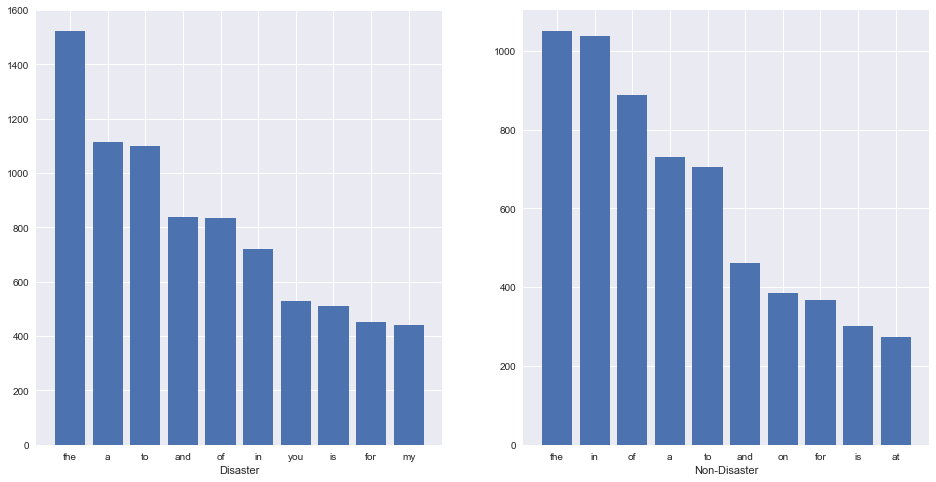

In [32]:
plt.figure(1, figsize = (16,8))
plt.subplot(1,2,1)
plt.bar(x0,y0)
plt.xlabel("Disaster")
plt.subplot(1,2,2)
plt.bar(x1,y1)
plt.xlabel("Non-Disaster")

# Punctuation 

In [33]:
punc0 = defaultdict(int)
for word in corpus0:
    if word in string.punctuation:
        punc0[word] +=1
        
punc1 = defaultdict(int)
for word in corpus1:
    if word in string.punctuation:
        punc1[word] +=1
        

In [34]:
top2 = sorted(punc0.items(), key = lambda x: x[1], reverse = True)#[:10]
top3 = sorted(punc1.items(), key = lambda x: x[1], reverse = True)#[:10]

In [35]:
x2, y2 = zip(*top2)
x3, y3 = zip(*top3)

Text(0.5, 0, 'Non-Disaster')

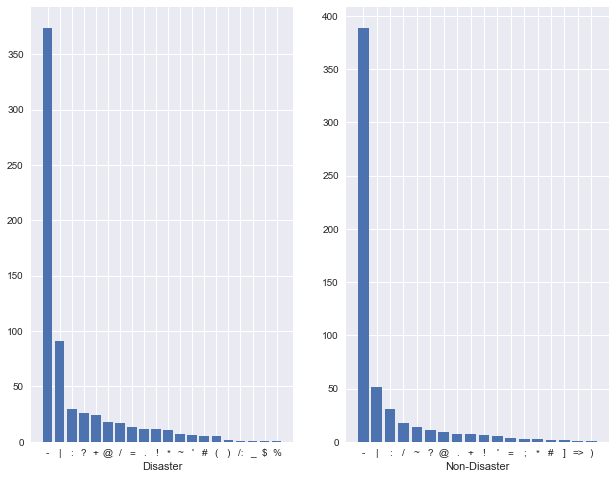

In [36]:
plt.figure(1, figsize = (16,8))
plt.subplot(1,3,1)
plt.bar(x2,y2)
plt.xlabel("Disaster")
plt.subplot(1,3,2)
plt.bar(x3,y3)
plt.xlabel("Non-Disaster")

# Remove URLs and HTML

In [37]:
import re
def remove_url(text):
    url = re.compile(r'https?://\s+|www\.\s+')
    return url.sub(r"", text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r"", text)


In [38]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

    
    
    return emoji_pattern.sub(r"", string)

# Remove Punctuation

In [39]:
def remove_punc(text):
    table = str.maketrans("","", string.punctuation)
    return text.translate(table)

In [40]:
df = pd.concat([df1,df2])

C:\Users\rahul\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [41]:
df

,Punctuation,Unique_words,id,keyword,location,target,text,text_len,word_count
0,1.0,13.0,1,-99,-99,1.0,Our Deeds are the Reason of this #earthquake M...,69.0,13.0
1,1.0,7.0,4,-99,-99,1.0,Forest fire near La Ronge Sask. Canada,38.0,7.0
2,3.0,20.0,5,-99,-99,1.0,All residents asked to 'shelter in place' are ...,133.0,22.0
3,2.0,8.0,6,-99,-99,1.0,"13,000 people receive #wildfires evacuation or...",65.0,8.0
4,2.0,15.0,7,-99,-99,1.0,Just got sent this photo from Ruby #Alaska as ...,88.0,16.0
...,...,...,...,...,...,...,...,...,...
3258,NaN,NaN,10861,NaN,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,NaN
3259,NaN,NaN,10865,NaN,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,NaN
3260,NaN,NaN,10868,NaN,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,NaN
3261,NaN,NaN,10874,NaN,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,NaN


In [42]:
df["text"] = df.text.map(lambda x: remove_url(x))
df["text"] = df.text.map(lambda x: remove_html(x))
df["text"] = df.text.map(lambda x: remove_emoji(x))
df["text"] = df.text.map(lambda x: remove_punc(x))

# Remove Stopwords

In [43]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

In [44]:
df["text"] = df["text"].map(remove_stopwords)

In [45]:
df["text"]

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
3258    earthquake safety los angeles ûò safety faste...
3259    storm ri worse last hurricane cityamp3others h...
3260      green line derailment chicago httptcoutbxlcbiuy
3261    meg issues hazardous weather outlook hwo httpt...
3262    cityofcalgary activated municipal emergency pl...
Name: text, Length: 10876, dtype: object

# WordCloud Plot

In [46]:
from wordcloud import WordCloud

In [47]:
corpus0 = creat_corpus(data=df, target=0)
corpus1 = creat_corpus(data=df, target=1)

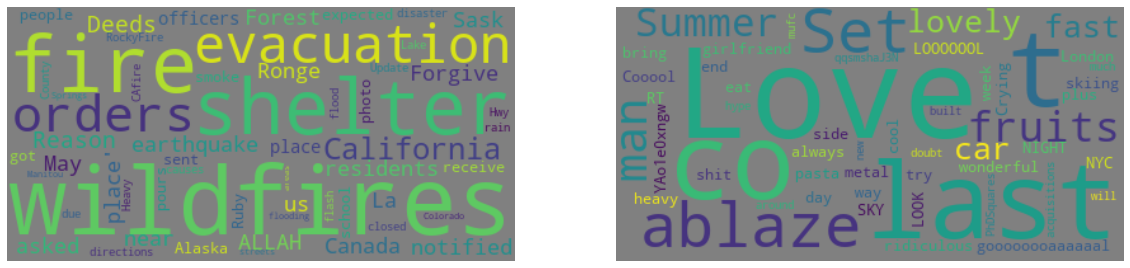

In [48]:
Word_Cloud0 = WordCloud(background_color = "gray", max_font_size = 100).generate(" ".join(corpus0[:100]))
Word_Cloud1 = WordCloud(background_color = "gray", max_font_size = 100).generate(" ".join(corpus1[:100]))    


plt.figure(1, figsize = (20,15))
plt.subplot(1,2,1)
plt.imshow(Word_Cloud1, interpolation="bilinear")
plt.xlabel("Disaster")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(Word_Cloud0, interpolation="bilinear")
plt.xlabel("Non-Disaster")
plt.axis("off")
plt.show()

# Glove for vectorization

In [49]:
import re
from nltk.tokenize import word_tokenize
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import Counter
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

Using TensorFlow backend.


In [50]:
def create_corpus(df):
    corpus = []
    for tweet in tqdm(df['text']):
        words = [word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus  

In [51]:
corpus = create_corpus(df)

100%|██████████████████████████████████████████████████████████████████████████| 10876/10876 [00:04<00:00, 2497.90it/s]


In [52]:
embedding_dict = {}
count = 0
with open(r'C:\Users\rahul\Desktop\EE258\Project 2\glove.6B.100d.txt', 'r',encoding="utf-8") as f:
    for line in f:
        try:
            values = line.split()
            word = values[0]
            vectors = np.asarray(values[1:], 'float32')
            embedding_dict[word] = vectors
        except:count = count+1
f.close()
print(count)

0


In [53]:
MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences, maxlen = MAX_LEN, truncating = 'post', padding = 'post')

In [54]:
word_index = tokenizer_obj.word_index
print('Number of unique words:', len(word_index))

Number of unique words: 21323


In [55]:
num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words, 100))
for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
        
    emb_vec = embedding_dict.get(word)   
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec

100%|████████████████████████████████████████████████████████████████████████| 21323/21323 [00:00<00:00, 337094.23it/s]


# Baseline Model using LSTM

In [56]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2132400   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,174,705
Trainable params: 42,305
Non-trainable params: 2,132,400
_________________________________________________________________


In [58]:
train_ = tweet_pad[:df1.shape[0]]
test = tweet_pad[df1.shape[0]:]

In [59]:
train_.shape

(7613, 50)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(train_,df1['target'].values, test_size = 0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [61]:
history = model.fit(X_train,y_train, batch_size = 4, epochs =15, validation_data = (X_test, y_test), verbose = 2)


Train on 6471 samples, validate on 1142 samples
Epoch 1/15
 - 53s - loss: 0.6915 - accuracy: 0.5715 - val_loss: 0.6902 - val_accuracy: 0.5613
Epoch 2/15
 - 59s - loss: 0.6872 - accuracy: 0.5719 - val_loss: 0.6856 - val_accuracy: 0.5613
Epoch 3/15
 - 62s - loss: 0.6499 - accuracy: 0.6093 - val_loss: 0.5714 - val_accuracy: 0.7329
Epoch 4/15
 - 61s - loss: 0.5872 - accuracy: 0.7160 - val_loss: 0.5204 - val_accuracy: 0.7811
Epoch 5/15
 - 103s - loss: 0.5657 - accuracy: 0.7365 - val_loss: 0.4995 - val_accuracy: 0.7828
Epoch 6/15
 - 64s - loss: 0.5603 - accuracy: 0.7370 - val_loss: 0.4943 - val_accuracy: 0.7960
Epoch 7/15
 - 45s - loss: 0.5578 - accuracy: 0.7382 - val_loss: 0.4887 - val_accuracy: 0.7951
Epoch 8/15
 - 41s - loss: 0.5494 - accuracy: 0.7486 - val_loss: 0.4846 - val_accuracy: 0.7933
Epoch 9/15
 - 41s - loss: 0.5452 - accuracy: 0.7464 - val_loss: 0.4807 - val_accuracy: 0.8004
Epoch 10/15
 - 43s - loss: 0.5420 - accuracy: 0.7520 - val_loss: 0.4798 - val_accuracy: 0.7933
Epoch 11/

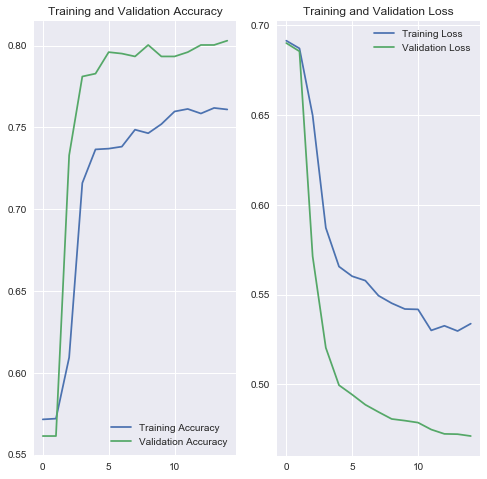

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# RNN

In [64]:
from keras.layers import SimpleRNN

In [65]:
model_RNN=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model_RNN.add(embedding)
model_RNN.add(SpatialDropout1D(0.2))
model_RNN.add(SimpleRNN(64))
model_RNN.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model_RNN.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [66]:
model_RNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           2132400   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 100)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                10560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,143,025
Trainable params: 10,625
Non-trainable params: 2,132,400
_________________________________________________________________


In [67]:
history_RNN = model_RNN.fit(X_train,y_train, batch_size = 4, epochs =15, validation_data = (X_test, y_test), verbose = 2)

Train on 6471 samples, validate on 1142 samples
Epoch 1/15
 - 16s - loss: 0.6698 - accuracy: 0.5888 - val_loss: 0.6395 - val_accuracy: 0.6410
Epoch 2/15
 - 15s - loss: 0.6265 - accuracy: 0.6582 - val_loss: 0.6097 - val_accuracy: 0.6804
Epoch 3/15
 - 16s - loss: 0.6005 - accuracy: 0.6931 - val_loss: 0.5915 - val_accuracy: 0.7102
Epoch 4/15
 - 19s - loss: 0.5887 - accuracy: 0.7027 - val_loss: 0.5818 - val_accuracy: 0.7075
Epoch 5/15
 - 15s - loss: 0.5829 - accuracy: 0.7089 - val_loss: 0.5716 - val_accuracy: 0.7137
Epoch 6/15
 - 14s - loss: 0.5689 - accuracy: 0.7234 - val_loss: 0.5626 - val_accuracy: 0.7268
Epoch 7/15
 - 17s - loss: 0.5605 - accuracy: 0.7252 - val_loss: 0.5550 - val_accuracy: 0.7364
Epoch 8/15
 - 15s - loss: 0.5536 - accuracy: 0.7330 - val_loss: 0.5477 - val_accuracy: 0.7426
Epoch 9/15
 - 14s - loss: 0.5478 - accuracy: 0.7334 - val_loss: 0.5438 - val_accuracy: 0.7452
Epoch 10/15
 - 15s - loss: 0.5452 - accuracy: 0.7342 - val_loss: 0.5419 - val_accuracy: 0.7469
Epoch 11/15

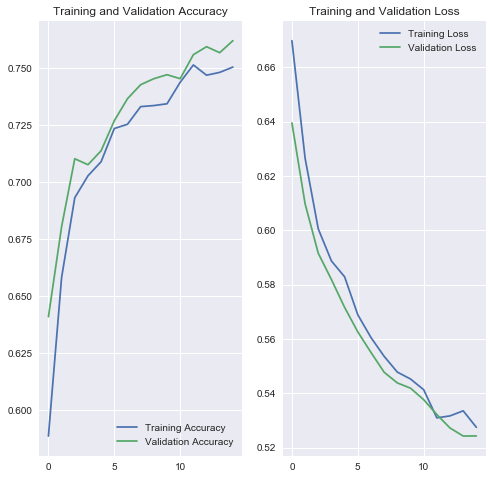

In [70]:
acc = history_RNN.history['accuracy']
val_acc = history_RNN.history['val_accuracy']

loss=history_RNN.history['loss']
val_loss=history_RNN.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Epochs Increased LSTM and RNN

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2132400   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,174,705
Trainable params: 42,305
Non-trainable params: 2,132,400
_________________________________________________________________


In [72]:
history_LSTM1 = model.fit(X_train,y_train, batch_size = 4, epochs =30, validation_data = (X_test, y_test), verbose = 2)

Train on 6471 samples, validate on 1142 samples
Epoch 1/30
 - 48s - loss: 0.5296 - accuracy: 0.7642 - val_loss: 0.4688 - val_accuracy: 0.8039
Epoch 2/30
 - 42s - loss: 0.5206 - accuracy: 0.7693 - val_loss: 0.4675 - val_accuracy: 0.8012
Epoch 3/30
 - 49s - loss: 0.5193 - accuracy: 0.7714 - val_loss: 0.4658 - val_accuracy: 0.8021
Epoch 4/30
 - 42s - loss: 0.5235 - accuracy: 0.7677 - val_loss: 0.4663 - val_accuracy: 0.8074
Epoch 5/30
 - 45s - loss: 0.5240 - accuracy: 0.7699 - val_loss: 0.4674 - val_accuracy: 0.8021
Epoch 6/30
 - 47s - loss: 0.5212 - accuracy: 0.7696 - val_loss: 0.4640 - val_accuracy: 0.8047
Epoch 7/30
 - 54s - loss: 0.5205 - accuracy: 0.7701 - val_loss: 0.4622 - val_accuracy: 0.8074
Epoch 8/30
 - 49s - loss: 0.5273 - accuracy: 0.7625 - val_loss: 0.4635 - val_accuracy: 0.8065
Epoch 9/30
 - 44s - loss: 0.5213 - accuracy: 0.7650 - val_loss: 0.4623 - val_accuracy: 0.8039
Epoch 10/30
 - 47s - loss: 0.5145 - accuracy: 0.7776 - val_loss: 0.4606 - val_accuracy: 0.8074
Epoch 11/30

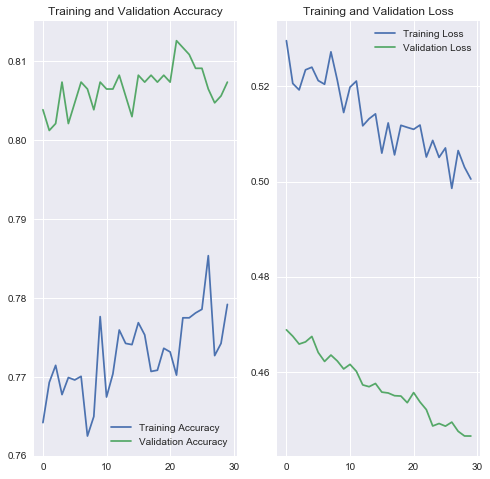

In [73]:
acc = history_LSTM1.history['accuracy']
val_acc = history_LSTM1.history['val_accuracy']

loss=history_LSTM1.history['loss']
val_loss=history_LSTM1.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:
model_RNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           2132400   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 100)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                10560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,143,025
Trainable params: 10,625
Non-trainable params: 2,132,400
_________________________________________________________________


In [75]:
history_RNN1 = model_RNN.fit(X_train,y_train, batch_size = 4, epochs =30, validation_data = (X_test, y_test), verbose = 2)

Train on 6471 samples, validate on 1142 samples
Epoch 1/30
 - 9s - loss: 0.5243 - accuracy: 0.7555 - val_loss: 0.5227 - val_accuracy: 0.7609
Epoch 2/30
 - 9s - loss: 0.5211 - accuracy: 0.7578 - val_loss: 0.5154 - val_accuracy: 0.7680
Epoch 3/30
 - 10s - loss: 0.5212 - accuracy: 0.7554 - val_loss: 0.5120 - val_accuracy: 0.7732
Epoch 4/30
 - 10s - loss: 0.5160 - accuracy: 0.7633 - val_loss: 0.5090 - val_accuracy: 0.7732
Epoch 5/30
 - 11s - loss: 0.5146 - accuracy: 0.7636 - val_loss: 0.5076 - val_accuracy: 0.7732
Epoch 6/30
 - 10s - loss: 0.5159 - accuracy: 0.7566 - val_loss: 0.5104 - val_accuracy: 0.7741
Epoch 7/30
 - 10s - loss: 0.5089 - accuracy: 0.7620 - val_loss: 0.5077 - val_accuracy: 0.7706
Epoch 8/30
 - 10s - loss: 0.5091 - accuracy: 0.7642 - val_loss: 0.5020 - val_accuracy: 0.7802
Epoch 9/30
 - 10s - loss: 0.5042 - accuracy: 0.7671 - val_loss: 0.4987 - val_accuracy: 0.7750
Epoch 10/30
 - 10s - loss: 0.5071 - accuracy: 0.7637 - val_loss: 0.4956 - val_accuracy: 0.7820
Epoch 11/30
 

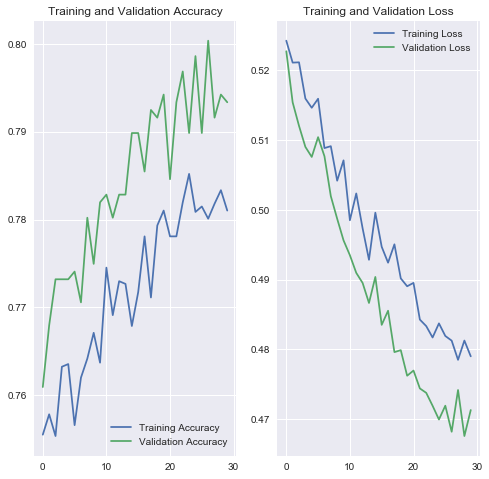

In [76]:
acc = history_RNN1.history['accuracy']
val_acc = history_RNN1.history['val_accuracy']

loss=history_RNN1.history['loss']
val_loss=history_RNN1.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Learning Rate Changes with LSTM and RNN

In [77]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 100)           2132400   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,174,705
Trainable params: 42,305
Non-trainable params: 2,132,400
_________________________________________________________________


In [79]:
history_LSTM2 = model.fit(X_train,y_train, batch_size = 4, epochs =30, validation_data = (X_test, y_test), verbose = 2)

Train on 6471 samples, validate on 1142 samples
Epoch 1/30
 - 25s - loss: 0.5830 - accuracy: 0.7084 - val_loss: 0.4879 - val_accuracy: 0.7942
Epoch 2/30
 - 28s - loss: 0.5358 - accuracy: 0.7617 - val_loss: 0.4865 - val_accuracy: 0.7890
Epoch 3/30
 - 27s - loss: 0.5351 - accuracy: 0.7585 - val_loss: 0.4661 - val_accuracy: 0.7960
Epoch 4/30
 - 28s - loss: 0.5222 - accuracy: 0.7694 - val_loss: 0.4645 - val_accuracy: 0.8065
Epoch 5/30
 - 29s - loss: 0.5097 - accuracy: 0.7711 - val_loss: 0.4563 - val_accuracy: 0.8135
Epoch 6/30
 - 28s - loss: 0.5060 - accuracy: 0.7759 - val_loss: 0.4497 - val_accuracy: 0.8082
Epoch 7/30
 - 29s - loss: 0.4993 - accuracy: 0.7790 - val_loss: 0.4479 - val_accuracy: 0.8109
Epoch 8/30
 - 27s - loss: 0.4980 - accuracy: 0.7821 - val_loss: 0.4531 - val_accuracy: 0.8039
Epoch 9/30
 - 29s - loss: 0.4897 - accuracy: 0.7846 - val_loss: 0.4543 - val_accuracy: 0.8074
Epoch 10/30
 - 30s - loss: 0.4895 - accuracy: 0.7790 - val_loss: 0.4435 - val_accuracy: 0.8161
Epoch 11/30

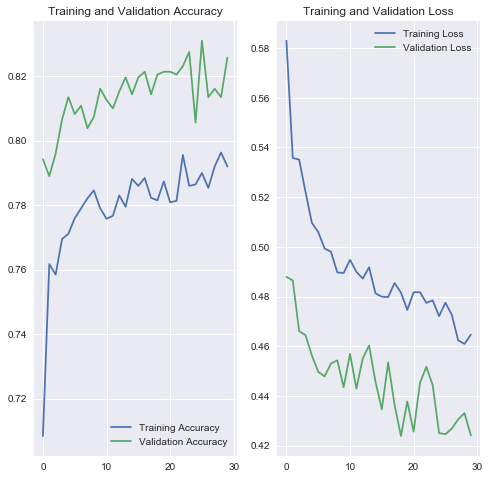

In [80]:
acc = history_LSTM2.history['accuracy']
val_acc = history_LSTM2.history['val_accuracy']

loss=history_LSTM2.history['loss']
val_loss=history_LSTM2.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [81]:
model_RNN=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model_RNN.add(embedding)
model_RNN.add(SpatialDropout1D(0.2))
model_RNN.add(SimpleRNN(64))
model_RNN.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-4)

model_RNN.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [82]:
model_RNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 100)           2132400   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 50, 100)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                10560     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 2,143,025
Trainable params: 10,625
Non-trainable params: 2,132,400
_________________________________________________________________


In [83]:
history_RNN2 = model_RNN.fit(X_train,y_train, batch_size = 4, epochs =30, validation_data = (X_test, y_test), verbose = 2)

Train on 6471 samples, validate on 1142 samples
Epoch 1/30
 - 9s - loss: 0.5872 - accuracy: 0.6954 - val_loss: 0.5281 - val_accuracy: 0.7496
Epoch 2/30
 - 10s - loss: 0.5420 - accuracy: 0.7419 - val_loss: 0.5160 - val_accuracy: 0.7557
Epoch 3/30
 - 11s - loss: 0.5207 - accuracy: 0.7597 - val_loss: 0.5030 - val_accuracy: 0.7706
Epoch 4/30
 - 11s - loss: 0.5120 - accuracy: 0.7625 - val_loss: 0.4954 - val_accuracy: 0.7732
Epoch 5/30
 - 11s - loss: 0.4995 - accuracy: 0.7733 - val_loss: 0.4673 - val_accuracy: 0.7995
Epoch 6/30
 - 13s - loss: 0.4953 - accuracy: 0.7786 - val_loss: 0.4726 - val_accuracy: 0.7925
Epoch 7/30
 - 11s - loss: 0.4871 - accuracy: 0.7782 - val_loss: 0.4664 - val_accuracy: 0.7995
Epoch 8/30
 - 10s - loss: 0.4795 - accuracy: 0.7850 - val_loss: 0.4571 - val_accuracy: 0.8012
Epoch 9/30
 - 10s - loss: 0.4693 - accuracy: 0.7903 - val_loss: 0.4561 - val_accuracy: 0.8012
Epoch 10/30
 - 11s - loss: 0.4719 - accuracy: 0.7951 - val_loss: 0.4473 - val_accuracy: 0.8091
Epoch 11/30


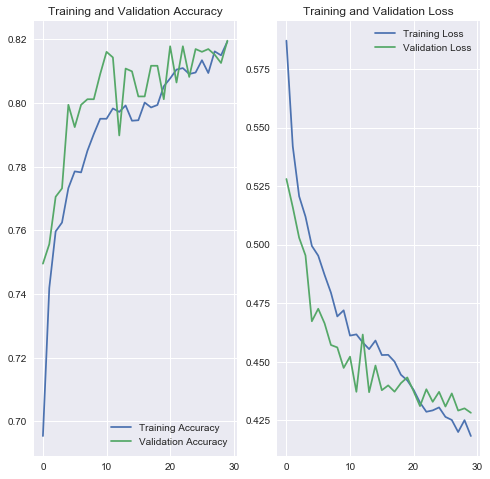

In [121]:
acc = history_RNN2.history['accuracy']
val_acc = history_RNN2.history['val_accuracy']

loss=history_RNN2.history['loss']
val_loss=history_RNN2.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# LSTM and RNN with Different Architecture

In [95]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 100)           2132400   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 2,249,777
Trainable params: 117,377
Non-trainable params: 2,132,400
_________________________________________________________________


In [97]:
history_LSTM3 = model.fit(X_train,y_train, batch_size = 4, epochs =50, validation_data = (X_test, y_test), verbose = 2)

Train on 6471 samples, validate on 1142 samples
Epoch 1/50
 - 51s - loss: 0.5588 - accuracy: 0.7331 - val_loss: 0.4705 - val_accuracy: 0.8004
Epoch 2/50
 - 48s - loss: 0.5083 - accuracy: 0.7753 - val_loss: 0.4591 - val_accuracy: 0.7951
Epoch 3/50
 - 50s - loss: 0.5031 - accuracy: 0.7680 - val_loss: 0.4472 - val_accuracy: 0.8021
Epoch 4/50
 - 52s - loss: 0.4957 - accuracy: 0.7688 - val_loss: 0.4544 - val_accuracy: 0.8091
Epoch 5/50
 - 49s - loss: 0.4899 - accuracy: 0.7770 - val_loss: 0.4336 - val_accuracy: 0.8109
Epoch 6/50
 - 49s - loss: 0.4811 - accuracy: 0.7820 - val_loss: 0.4401 - val_accuracy: 0.8135
Epoch 7/50
 - 52s - loss: 0.4843 - accuracy: 0.7837 - val_loss: 0.4341 - val_accuracy: 0.8170
Epoch 8/50
 - 51s - loss: 0.4912 - accuracy: 0.7781 - val_loss: 0.4361 - val_accuracy: 0.8126
Epoch 9/50
 - 51s - loss: 0.4791 - accuracy: 0.7830 - val_loss: 0.4422 - val_accuracy: 0.8039
Epoch 10/50
 - 50s - loss: 0.4837 - accuracy: 0.7832 - val_loss: 0.4373 - val_accuracy: 0.8196
Epoch 11/50

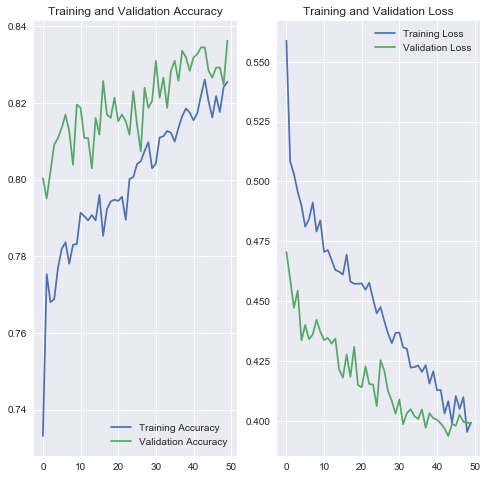

In [99]:
acc = history_LSTM3.history['accuracy']
val_acc = history_LSTM3.history['val_accuracy']

loss=history_LSTM3.history['loss']
val_loss=history_LSTM3.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [115]:
model_RNN=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model_RNN.add(embedding)
model_RNN.add(SpatialDropout1D(0.2))
model_RNN.add(SimpleRNN(100))
model_RNN.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-4)

model_RNN.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [116]:
model_RNN.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 50, 100)           2132400   
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 50, 100)           0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 2,152,601
Trainable params: 20,201
Non-trainable params: 2,132,400
_________________________________________________________________


In [117]:
history_RNN3 = model_RNN.fit(X_train,y_train, batch_size = 4, epochs =40, validation_data = (X_test, y_test), verbose = 2)

Train on 6471 samples, validate on 1142 samples
Epoch 1/40
 - 22s - loss: 0.5817 - accuracy: 0.7051 - val_loss: 0.5596 - val_accuracy: 0.7285
Epoch 2/40
 - 20s - loss: 0.5312 - accuracy: 0.7594 - val_loss: 0.5122 - val_accuracy: 0.7574
Epoch 3/40
 - 21s - loss: 0.5087 - accuracy: 0.7711 - val_loss: 0.4824 - val_accuracy: 0.7881
Epoch 4/40
 - 20s - loss: 0.5052 - accuracy: 0.7707 - val_loss: 0.4772 - val_accuracy: 0.7855
Epoch 5/40
 - 22s - loss: 0.4941 - accuracy: 0.7764 - val_loss: 0.4738 - val_accuracy: 0.7960
Epoch 6/40
 - 20s - loss: 0.4817 - accuracy: 0.7821 - val_loss: 0.4643 - val_accuracy: 0.7907
Epoch 7/40
 - 21s - loss: 0.4817 - accuracy: 0.7827 - val_loss: 0.4628 - val_accuracy: 0.8021
Epoch 8/40
 - 20s - loss: 0.4735 - accuracy: 0.7866 - val_loss: 0.4629 - val_accuracy: 0.8065
Epoch 9/40
 - 20s - loss: 0.4698 - accuracy: 0.7929 - val_loss: 0.4594 - val_accuracy: 0.8082
Epoch 10/40
 - 20s - loss: 0.4643 - accuracy: 0.7912 - val_loss: 0.4450 - val_accuracy: 0.8056
Epoch 11/40

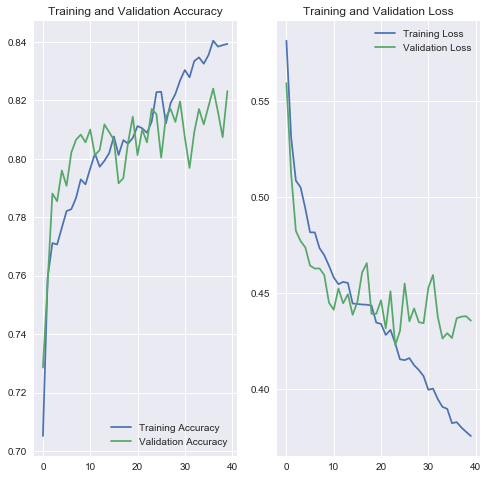

In [122]:
acc = history_RNN3.history['accuracy']
val_acc = history_RNN3.history['val_accuracy']

loss=history_RNN3.history['loss']
val_loss=history_RNN3.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Creating Submission File with Predictions

In [118]:
sample_sub = pd.read_csv(r"C:\Users\rahul\Desktop\EE258\Project 2/sample_submission.csv")

In [119]:
y_pred=model.predict(test)
y_pred=np.round(y_pred).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pred})
sub.to_csv(r'C:\Users\rahul\Desktop\EE258\Project 2\submission3.csv',index=False)

In [120]:
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
